# Image preprocessing

In [3]:
import data_reader

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = r"C:\Users\Alejandro\Desktop\heterogeneous-data\data\gdc_download_20220427_144600.480657"

#case_id = os.listdir(data_path) # For all data


In [3]:
SPLITS = [1,2,3,4,5,6,7,8,9]

for SPLIT in SPLITS:
    print(f"Procesando SPLIT: {SPLIT}")

    name = f"data_set_x20_100%_split{SPLIT}"

    case_id = open(f"C:\\Users\\Alejandro\\Desktop\\heterogeneous-data\\splits\\testsplit{SPLIT}.txt", "r").read().split()

    paths = [data_path + "\\" + case for case in case_id] # All case folders paths

    data_r = data_reader.Data_reader(
        folder_name="gdc_download_20220427_144600.480657",
        formats=[".svs"])

    data_set = data_r.read_data(
            paths,
            patch_size=512,
            name = name)

Procesando SPLIT: 1


100%|██████████| 25/25 [44:16<00:00, 106.28s/it]


15.17431640625
Procesando SPLIT: 2


100%|██████████| 25/25 [1:04:54<00:00, 155.79s/it]


19.5205078125
Procesando SPLIT: 3


100%|██████████| 25/25 [59:51<00:00, 143.68s/it] 


16.31689453125
Procesando SPLIT: 4


100%|██████████| 25/25 [49:35<00:00, 119.00s/it]


16.2037353515625
Procesando SPLIT: 5


100%|██████████| 25/25 [57:43<00:00, 138.52s/it] 


16.1136474609375
Procesando SPLIT: 6


100%|██████████| 25/25 [53:51<00:00, 129.27s/it] 


16.987060546875
Procesando SPLIT: 7


100%|██████████| 25/25 [1:00:22<00:00, 144.90s/it]


14.1383056640625
Procesando SPLIT: 8


100%|██████████| 25/25 [1:01:29<00:00, 147.56s/it]


14.6854248046875
Procesando SPLIT: 9


100%|██████████| 25/25 [1:05:01<00:00, 156.04s/it]


15.7554931640625


In [4]:
import torch
import random
import data_reader

In [5]:
def shuffle(X, y): # Esta función debería hacer un shuffle del data set sin desordenar las etiquetas
  c = list(zip(X, y))
  random.shuffle(c)
  X, y = zip(*c)
  return torch.tensor(X), torch.tensor(y)

In [6]:
# Choosing only the images from the according splits (10CV)

EXP_NAME = "EJEMPLO"

data_set_name = f"data_set_x20_100%_split"

for SPLIT in range(1):
    MODEL_NAME = EXP_NAME + f"{SPLIT}"

    train_X, train_y = [], []

    TRAIN_SPLITS =list(range(3))
    TRAIN_SPLITS.remove(SPLIT)

    for i in TRAIN_SPLITS:

        print(f"Loading training split: {i}")
        split_name = data_set_name + f"{i}"
        
        X_, y_, _ , _ = data_reader.read_lmdb(f"C:/Users/Alejandro/Desktop/heterogeneous-data/data/patches/{split_name}")
        train_X.extend(X_)
        train_y.extend(y_)
        print("Finish")
        
    train_X, train_y = shuffle(train_X, train_y)
    
    print(f"Patches for training: {len(train_y)}\n")
    split_name = data_set_name + f"{SPLIT}"

    print(f"Loading validation split: {SPLIT}\n")
    X_, y_, _ , _ = data_reader.read_lmdb(f"C:/Users/Alejandro/Desktop/heterogeneous-data/data/patches/{split_name}")

    #val_X, val_y = shuffle(X_, y_)

    #init()

    #train()

    #del train_X, train_y, val_X, val_y


Loading training split: 1
Read lmdb
Finish
Loading training split: 2
Read lmdb


Number of patches:  942
Percentage of positive patches:  0.5445859872611465


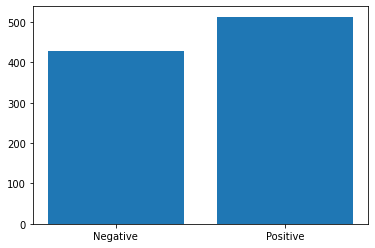

In [ ]:
positive = [(i[0]==1) for i in y].count(True)
plt.bar(["Negative", "Positive"], [len(y)-positive ,positive])

print("Number of patches: ", len(y))
print("Percentage of positive patches: ", positive/len(y))

[243 239 239 ... 155  67 110]
(786432,)


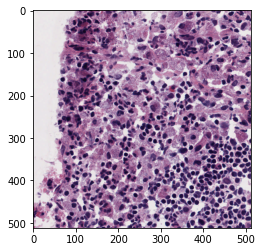

In [ ]:
idx = 200

#print(y[idx])

print(X[0])

print(X[idx].shape)

plt.imshow(X[idx].reshape(512, 512, 3))